# Valide toujours ta variable de sortie avant d'utiliser la régression linéaire

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

plt.style.use(["seaborn-v0_8-darkgrid"])
c_list = ['#46C7C7', '#00B9FF', '#FF7051']

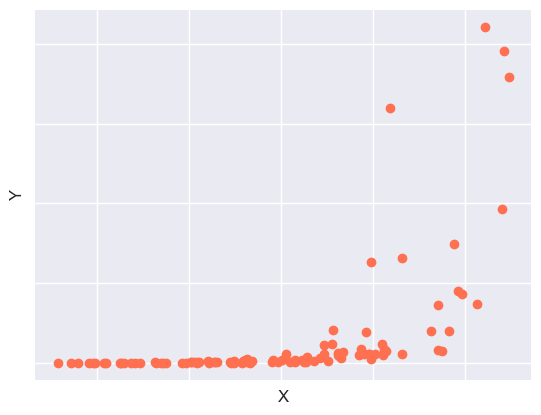

In [2]:
np.random.seed(123)

# Générer des valeurs aléatoires de X
X = np.random.uniform(low=-5, high=5, size=(100, 1))

# Générer une variable dépendante Y avec une distribution asymétrique
Y = 10 + X + np.random.normal(loc=0, scale=1, size=(100, 1))
Y = np.exp(Y)

# Tracer les données
fig, ax = plt.subplots()
plt.scatter(X, Y, c = c_list[2])
plt.xlabel('X')
plt.ylabel('Y')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

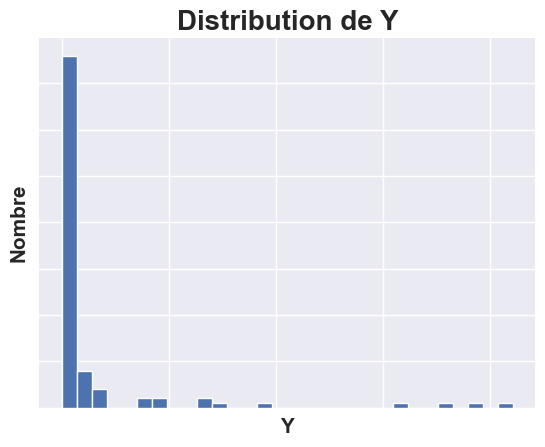

In [3]:
# Tracer les données
fig, ax = plt.subplots()

plt.hist(Y, bins=30)
plt.ylabel('Nombre', fontsize=15, fontweight="bold")
plt.xlabel('Y', fontsize=15, fontweight="bold")
plt.title('Distribution de Y', fontsize = 20, fontweight="bold")
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()

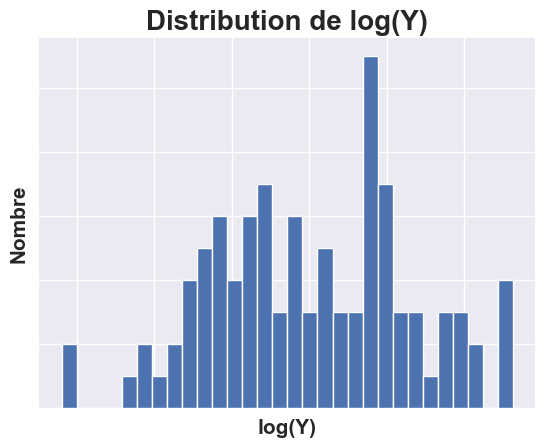

In [4]:
# Tracer les données
fig, ax = plt.subplots()

plt.hist(np.log(Y), bins=30)
plt.ylabel('Nombre', fontsize=15, fontweight="bold")
plt.xlabel('log(Y)', fontsize=15, fontweight="bold")
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.title('Distribution de log(Y)', fontsize = 20, fontweight="bold")

plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

# Entraîner un modèle de régression linéaire sans tenir compte de l'asymétrie
model1 = LinearRegression().fit(X, Y)

# Entraîner un modèle de régression linéaire avec une transformation logarithmique pour tenir compte de l'asymétrie
model2 = LinearRegression().fit(X, np.log(Y))

In [6]:
# Générer des valeurs X pour le tracé
X_plot = np.linspace(-5, 5, 100).reshape(-1, 1)

# Obtenir les prédictions de chaque modèle
Y_pred1 = model1.predict(X_plot)
Y_pred2 = model2.predict(X_plot)

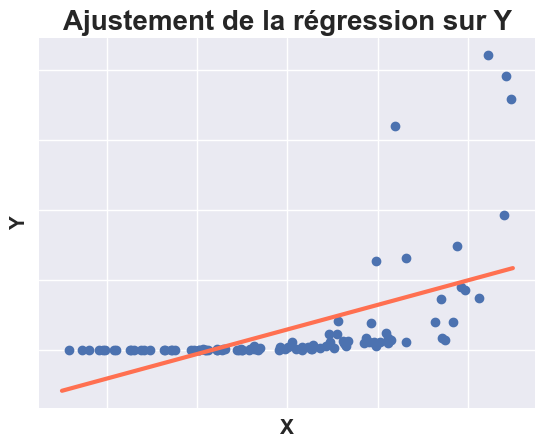

In [7]:
# Tracer les données et les prédictions de chaque modèle
fig, ax = plt.subplots()

plt.scatter(X, Y)
plt.plot(X_plot, Y_pred1, c = c_list[2], linewidth = 3)
plt.xlabel('X', fontsize=15, fontweight="bold")
plt.ylabel('Y', fontsize=15, fontweight="bold")
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.title('Ajustement de la régression sur Y', fontsize = 20, fontweight="bold")

plt.show()

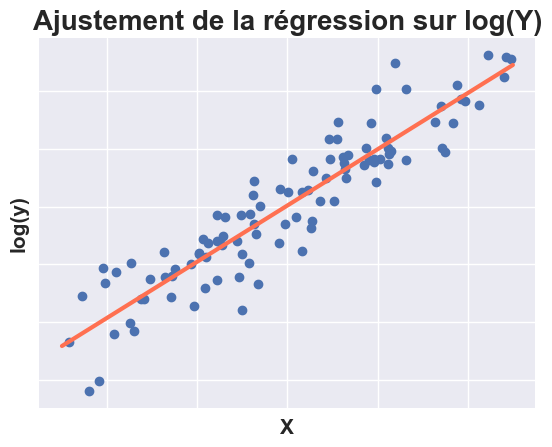

In [8]:
# Tracer les données et les prédictions de chaque modèle
fig, ax = plt.subplots()

plt.scatter(X, np.log(Y))
plt.plot(X_plot, Y_pred2, c = c_list[2], linewidth = 3)
plt.xlabel('X', fontsize=15, fontweight="bold")
plt.ylabel('log(y)', fontsize=15, fontweight="bold")
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.title('Ajustement de la régression sur log(Y)', fontsize = 20, fontweight="bold")

plt.show()
